### 📊 # **Анализ объявлений о недвижимости на Krisha.kz**

### 📊 ## **Цель проекта:**

Провести анализ данных о недвижимости, собранных с Krisha.kz, чтобы выявить тренды, паттерны и инсайты по ценам, локациям и характеристикам недвижимости.

### **Этап 1: Настройка среды**

### 📊 * Установите необходимые библиотеки:

In [1]:
# Your code goes here
# они все установлены

### 📊 * Импортируйте библиотеки в скрипт Python или Jupyter Notebook:

In [1]:
# Парсинг страницы с использованием BeautifulSoup
# Your code goes here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import seaborn as sns

### **Этап 2: Сбор данных с Krisha.kz**
1. Анализ структуры сайта:
  * Откройте Krisha.kz и изучите структуру HTML-кода с помощью инструментов разработчика (ПКМ > Исследовать элемент).
  * Найдите HTML-теги, содержащие данные:
    * Название объекта (например, "2-комнатная квартира")
    * Цена
    * Расположение
    * Количество комнат
    * Площадь (м²)
    * Дополнительные параметры (этаж, год постройки и т.д.)
  * Отправка HTTP-запросов:
    * Используйте requests для отправки запросов.
    * Настройте скрипт для работы с пагинацией.
    * Не забудьте приостанавливать скрипт



In [ ]:
# Пагинация — это метод разбиения больших объемов данных или содержимого на более мелкие части (страницы), чтобы упростить 
# их отображение, обработку или навигацию. 

In [2]:
df = pd.read_csv('krisha_almaty_data.csv')
df.head(3)
# Обработка пропущенных значений
df.fillna('Нет данных', inplace=True)  # Заполняем пропуски значением 'Нет данных'


,Название объекта,Цена,Расположение,Количество комнат,Площадь (м²),Дополнительные параметры
0,1-комнатная квартира · 30.6 м²,от 12 889 000 〒,Устирт 2936а/1,1,1-комнатная квартира · 30.6 м²,NaN
1,3-комнатная квартира · 80 м² · 8/17 этаж,92 000 000 〒,"Бостандыкский р-н, Аль-Фараби 41 — Вид на Кок-...",3,3-комнатная квартира · 80 м² · 8/17 этаж,NaN
2,2-комнатная квартира · 59.5 м² · 14/16 этаж,32 500 000 〒,"Наурызбайский р-н, Абишева",2,2-комнатная квартира · 59.5 м² · 14/16 этаж,NaN


In [3]:
df.head()

,Название объекта,Цена,Расположение,Количество комнат,Площадь (м²),Дополнительные параметры
0,1-комнатная квартира · 30.6 м²,от 12 889 000 〒,Устирт 2936а/1,1,1-комнатная квартира · 30.6 м²,NaN
1,3-комнатная квартира · 80 м² · 8/17 этаж,92 000 000 〒,"Бостандыкский р-н, Аль-Фараби 41 — Вид на Кок-...",3,3-комнатная квартира · 80 м² · 8/17 этаж,NaN
2,2-комнатная квартира · 59.5 м² · 14/16 этаж,32 500 000 〒,"Наурызбайский р-н, Абишева",2,2-комнатная квартира · 59.5 м² · 14/16 этаж,NaN
3,2-комнатная квартира · 49.74 м²,от 23 875 200 〒,"Жетысуский р-н, Райымбека 241",2,2-комнатная квартира · 49.74 м²,NaN
4,2-комнатная квартира · 56 м²,62 500 000 〒,"Бостандыкский р-н, Аль-фараби 27/3 — Сейфуллина",2,2-комнатная квартира · 56 м²,NaN


In [113]:
df = pd.read_csv('krisha_training.csv')
df
# Обработка пропущенных значений
df.fillna('Нет данных', inplace=True)  # Заполняем пропуски значением 'Нет данных'


,Название объекта,Цена,Расположение,Район,Количество комнат,Площадь (м²),Дополнительные параметры
0,2-комнатная квартира,от 91 247 800 〒,"Бостандыкский р-н, Лебедева 1/1",Бостандыкский,2,93.11,Construction year: 2025
1,4-комнатная квартира,76 000 000 〒,Розыбакиева 247 — Мегацентр,NaN,4,125.00,Floor: 13/13; House Type: монолитный дом; C...
2,1-комнатная квартира,от 13 795 000 〒,"Алатауский р-н, Момышулы, севернее ул. Монке би",Алатауский,1,44.50,Construction year: 2027
3,2-комнатная квартира,от 26 445 500 〒,"Алатауский р-н, мкр Аккент, мкр. Аккент",Алатауский,2,64.50,Construction year: 2023
4,2-комнатная квартира,от 26 000 000 〒,вдоль Капчагайской трассы,NaN,2,65.50,Construction year: 2023
5,1-комнатная квартира,от 10 032 000 〒,"Алатауский р-н, Момышулы, севернее ул. Монке би",Алатауский,1,30.40,Construction year: 2027
6,4-комнатная квартира,от 233 895 000 〒,"Медеуский р-н, Городская 3",Медеуский,4,150.90,Construction year: 2026
7,3-комнатная квартира,от 29 317 500 〒,"Турксибский р-н, Тараз",Турксибский,3,65.15,Construction year: 2025
8,2-комнатная квартира,от 23 134 800 〒,"Турксибский р-н, Тараз",Турксибский,2,44.49,Construction year: 2025
9,4-комнатная квартира,от 208 260 000 〒,"Наурызбайский р-н, мкр Рахат, мкр. Рахат, ул. ...",Наурызбайский,4,160.20,Construction year: 2025


In [36]:
df.loc[4]

Название объекта                                         1-комнатная квартира
Цена                                                           от 9 405 000 〒
Расположение                  Алатауский р-н, Момышулы, севернее ул. Монке би
Район                                                              Алатауский
Количество комнат                                                           1
Площадь (м²)                                                             28.5
Дополнительные параметры    ['House Type: жил. комплекс Каспий', 'Construc...
Name: 4, dtype: object

In [4]:
df = pd.read_csv('krisha_training.csv')
df[df['Район'].isnull()]
# Обработка пропущенных значений
df.fillna('Нет данных', inplace=True)  # Заполняем пропуски значением 'Нет данных'


,Название объекта,Цена,Расположение,Район,Количество комнат,Площадь (м²),Дополнительные параметры
50,2-комнатная квартира,от 87 768 000 〒,Минина,NaN,2,72.0,NaN
62,2-комнатная квартира,от 26 988 000 〒,Устирт 2936а/1,NaN,2,69.2,NaN


In [ ]:
################
# постройка с нуля, то что сверху это тестировка того, что написано снизу

In [37]:
# Парсинг страницы с использованием BeautifulSoup
base_url = "https://krisha.kz/prodazha/kvartiry/almaty/?page="
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
}

response = requests.get(base_url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')
    ads = soup.select("div.a-card.a-storage-live")
    ad = ads[0]



In [112]:
price = ad.find("div", class_="a-card__price").text.strip('от〒') if ad.find("div", class_="a-card__price") else None

if price:
    # Убираем переносы строк и неразрывные пробелы
    price = price.replace("\n", "").replace("\xa0", "").replace("〒", "").strip()
    try:
        # Преобразуем в целое число
        price = int(price)
    except ValueError:
        # Если преобразование не удалось (например, строка пустая или некорректная)
        price = None
print(price)

None


In [6]:
title = ad.find("a", class_="a-card__title").text.strip() if ad.find("a", class_="a-card__title") else None
print(title)

1-комнатная квартира · 31 м² · 3/4 этаж


In [7]:
title = ad.find("a", class_="a-card__title").text.strip().split(' · ') if ad.find("a", class_="a-card__title") else None
print(title)
print(title[0])

['1-комнатная квартира', '31 м²', '3/4 этаж']
1-комнатная квартира


In [8]:
area = None
for el in title:
    if "м²" in el:
        area = el.split()[0]
print(area)

31


In [9]:
location = ad.find("div", class_="a-card__subtitle").text.strip() if ad.find("div", class_="a-card__subtitle") else None
print(location)

Наурызбайский р-н, мкр Шугыла, Дала


In [16]:
district = ad.find("div", class_="a-card__subtitle").text.strip().split(',') if ad.find("div", class_="a-card__subtitle") else None
print(district)
for el in district:
    if 'р-н' in el:
        district = el
        break
print(district)
district = district.split()[0]
print(district)

['Наурызбайский р-н', ' мкр Шугыла', ' Дала']
Наурызбайский р-н
Наурызбайский


In [57]:
# доп инфа для 1 дома
house_additional_info = []

In [58]:
floor = None
for el in title:
    if "этаж" in el:
        floor = f'Floor: {el.split()[0]}'
        break
print(floor)
house_additional_info.append(floor)

Floor: 3/4


In [38]:
# это наше полное описание, отсюда нам необходимо вытащить тип дома и год постройки
description = ad.find("div", class_="a-card__text-preview").text.strip().split(',') if ad.find("div", class_="a-card__text-preview") else None
print(description)


['жил. комплекс Tumar', ' 9 этажей', ' 2025 г.п.', ' потолки 3м.', ' санузел совмещенный', ' “TUMAR” - Уют', ' Комфорт', ' Безопасность! Современная концепция жизни в мегаполисе!Преимущества:…']


In [52]:
house_type = None
for el in description:
    if 'кирпичный дом' in el  or 'панельный дом' in el or 'монолитный дом' in el:
        house_type = f'House Type: {el}'
        break
print(house_type)
house_additional_info.append(house_type)

None


In [59]:
construction_year = None
for el in description:
    if 'г.п.' in el:
        construction_year = f'Construction year: {el.split()[0]}'
        break
print(construction_year)
house_additional_info.append(construction_year)

Construction year: 2025


In [60]:
house_additional_info.append('Type: brick')

In [77]:
print(house_additional_info)

['Floor: 5/10', 'House Type: кирпичный дом', 'Construction year: 2005']


In [79]:
strr = '\n'.join(house_additional_info)
print(strr)

Floor: 5/10
House Type: кирпичный дом
Construction year: 2005


In [80]:
lst = []
res = lst.append('\n'.join(house_additional_info))
print(res)

None


In [74]:
house_additional_info = ['Floor: 5/10', 'House Type: кирпичный дом', 'Construction year: 2005']
result = "\n".join(house_additional_info)
print(result)


Floor: 5/10
House Type: кирпичный дом
Construction year: 2005


In [37]:
ad

<div class="a-card a-storage-live ddl_product ddl_product_link not-colored is-visible" data-color="" data-id="698802993" data-product-id="698802993" data-uuid="1a617fc7-f0e1-4bb8-9b81-3adeeb8cad0d" id="id-698802993">
<div class="a-card__inc">
<a class="a-card__image tm-click-checked-hot-adv" data-nb="11" href="/a/show/698802993" rel="nofollow" target="_blank">
<picture class="a-image__picture is-moderated has-photo" data-full-src="https://krisha-photos.kcdn.online/webp/1a/1a617fc7-f0e1-4bb8-9b81-3adeeb8cad0d/9-full.jpg" data-name="9" data-photo-id="9" title="">
<source srcset="https://krisha-photos.kcdn.online/webp/1a/1a617fc7-f0e1-4bb8-9b81-3adeeb8cad0d/9-400x300.webp 1x, https://krisha-photos.kcdn.online/webp/1a/1a617fc7-f0e1-4bb8-9b81-3adeeb8cad0d/9-750x470.webp 1.5x, https://krisha-photos.kcdn.online/webp/1a/1a617fc7-f0e1-4bb8-9b81-3adeeb8cad0d/9-750x470.webp 2x" type="image/webp"/>
<source srcset="https://krisha-photos.kcdn.online/webp/1a/1a617fc7-f0e1-4bb8-9b81-3adeeb8cad0d/9-400

### Квартиры в Алматы

In [151]:
# Парсинг страницы с использованием BeautifulSoup
# Your code goes here
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Базовый URL для сбора данных
base_url = "https://krisha.kz/prodazha/kvartiry/almaty/?page="

# Заголовки для обхода блокировки, сервер на Krisha.kz будет думать, что это я сижу на их странице, а не прога или бот
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
}

# Списки для хранения данных
titles = []
prices = []
locations = []
districts = []
rooms = []
areas = []
houses_additional_info = []

# Функция для извлечения данных с одной страницы
def parse_page(page_url):
    response = requests.get(page_url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    ads = soup.find_all("div", class_="a-card")  # Основной контейнер для объявления

    for ad in ads:
        # Название объекта
        title = ad.find("a", class_="a-card__title").text.strip().split(' · ') if ad.find("a", class_="a-card__title") else None
        titles.append(title[0])
        
        # Цена
        price = ad.find("div", class_="a-card__price").text.strip() if ad.find("div", class_="a-card__price") else None
        prices.append(price)
        
    
        # Расположение
        location = ad.find("div", class_="a-card__subtitle").text.strip() if ad.find("div", class_="a-card__subtitle") else None
        locations.append(location)
        
        # Район
        district = ad.find("div", class_="a-card__subtitle").text.strip().split(',') if ad.find("div", class_="a-card__subtitle") else None
        for el in district:
            if 'р-н' in el:
                district = el
                district = district.split()[0]
                break
        else:
            district = None

        districts.append(district)
        
        # Количество комнат (извлекаем из названия)
        room = title[0].split("-")[0] if title else None
        
        rooms.append(room)
        
        # Площадь (ищем в описании)
        area = None
        for el in title:
            if "м²" in el:
                area = el.split()[0]
                
            
        areas.append(area)
        
        # Дополнительные параметры
        # это наше полное описание, отсюда нам необходимо вытащить тип дома и год постройки
        description = ad.find("div", class_="a-card__text-preview").text.strip().split(',') if ad.find("div", class_="a-card__text-preview") else None
        house_additional_info = []
        # первый доп параметр этаж
        floor = None
        for el in title:
            if "этаж" in el:
                floor = f'Floor: {el.split()[0]}'
                house_additional_info.append(floor)
                break
        
        # второй доп параметр тип дома
        house_type = None
        for el in description:
            if 'кирпичный дом' in el  or 'панельный дом' in el or 'монолитный дом' in el:
                house_type = f'House Type: {el}'
                house_additional_info.append(house_type)
                break
        # третий: год постройки
        construction_year = None
        for el in description:
            if 'г.п.' in el:
                construction_year = f'Construction year: {el.split()[0]}'
                house_additional_info.append(construction_year)
                break
        houses_additional_info.append(';  '.join(house_additional_info))



    # Обход страниц
for page in range(1, 1000):  # От 1 до 1000 страниц
    print(f"Собираем данные с {page}-й страницы...")
    page_url = f"{base_url}{page}"
    
    try:
        parse_page(page_url)
        time.sleep(2)  # Пауза между запросами, чтобы избежать блокировки
    except Exception as e:
        print(f"Ошибка на странице {page}: {e}")
        continue

# Создание DataFrame и сохранение в CSV
data = pd.DataFrame({
    "Название объекта": titles,
    "Цена": prices,
    "Расположение": locations,
    "Район": districts,
    "Количество комнат": rooms,
    "Площадь (м²)": areas,
    "Дополнительные параметры": houses_additional_info
})

# Сохранение в файл
data.to_csv("krisha_almaty_kvartiry.csv", index=False, encoding="utf-8")
print("Данные успешно сохранены в krisha_almaty_kvartiry.csv!")


Собираем данные с 1-й страницы...
Собираем данные с 2-й страницы...
Собираем данные с 3-й страницы...
Собираем данные с 4-й страницы...
Собираем данные с 5-й страницы...
Собираем данные с 6-й страницы...
Собираем данные с 7-й страницы...
Собираем данные с 8-й страницы...
Собираем данные с 9-й страницы...
Собираем данные с 10-й страницы...
Собираем данные с 11-й страницы...
Собираем данные с 12-й страницы...
Собираем данные с 13-й страницы...
Собираем данные с 14-й страницы...
Собираем данные с 15-й страницы...
Собираем данные с 16-й страницы...
Собираем данные с 17-й страницы...
Собираем данные с 18-й страницы...
Собираем данные с 19-й страницы...
Собираем данные с 20-й страницы...
Собираем данные с 21-й страницы...
Собираем данные с 22-й страницы...
Собираем данные с 23-й страницы...
Собираем данные с 24-й страницы...
Собираем данные с 25-й страницы...
Собираем данные с 26-й страницы...
Собираем данные с 27-й страницы...
Собираем данные с 28-й страницы...
Собираем данные с 29-й страни

Собираем данные с 232-й страницы...
Собираем данные с 233-й страницы...
Собираем данные с 234-й страницы...
Собираем данные с 235-й страницы...
Собираем данные с 236-й страницы...
Собираем данные с 237-й страницы...
Собираем данные с 238-й страницы...
Собираем данные с 239-й страницы...
Собираем данные с 240-й страницы...
Собираем данные с 241-й страницы...
Собираем данные с 242-й страницы...
Собираем данные с 243-й страницы...
Собираем данные с 244-й страницы...
Собираем данные с 245-й страницы...
Собираем данные с 246-й страницы...
Собираем данные с 247-й страницы...
Собираем данные с 248-й страницы...
Собираем данные с 249-й страницы...
Собираем данные с 250-й страницы...
Собираем данные с 251-й страницы...
Собираем данные с 252-й страницы...
Собираем данные с 253-й страницы...
Собираем данные с 254-й страницы...
Собираем данные с 255-й страницы...
Собираем данные с 256-й страницы...
Собираем данные с 257-й страницы...
Собираем данные с 258-й страницы...
Собираем данные с 259-й стра

Собираем данные с 460-й страницы...
Собираем данные с 461-й страницы...
Собираем данные с 462-й страницы...
Собираем данные с 463-й страницы...
Собираем данные с 464-й страницы...
Собираем данные с 465-й страницы...
Собираем данные с 466-й страницы...
Собираем данные с 467-й страницы...
Собираем данные с 468-й страницы...
Собираем данные с 469-й страницы...
Собираем данные с 470-й страницы...
Собираем данные с 471-й страницы...
Собираем данные с 472-й страницы...
Собираем данные с 473-й страницы...
Собираем данные с 474-й страницы...
Собираем данные с 475-й страницы...
Собираем данные с 476-й страницы...
Собираем данные с 477-й страницы...
Собираем данные с 478-й страницы...
Собираем данные с 479-й страницы...
Собираем данные с 480-й страницы...
Собираем данные с 481-й страницы...
Собираем данные с 482-й страницы...
Собираем данные с 483-й страницы...
Собираем данные с 484-й страницы...
Собираем данные с 485-й страницы...
Собираем данные с 486-й страницы...
Собираем данные с 487-й стра

Собираем данные с 688-й страницы...
Собираем данные с 689-й страницы...
Собираем данные с 690-й страницы...
Собираем данные с 691-й страницы...
Собираем данные с 692-й страницы...
Собираем данные с 693-й страницы...
Собираем данные с 694-й страницы...
Собираем данные с 695-й страницы...
Собираем данные с 696-й страницы...
Собираем данные с 697-й страницы...
Собираем данные с 698-й страницы...
Собираем данные с 699-й страницы...
Собираем данные с 700-й страницы...
Собираем данные с 701-й страницы...
Собираем данные с 702-й страницы...
Собираем данные с 703-й страницы...
Собираем данные с 704-й страницы...
Собираем данные с 705-й страницы...
Собираем данные с 706-й страницы...
Собираем данные с 707-й страницы...
Собираем данные с 708-й страницы...
Собираем данные с 709-й страницы...
Собираем данные с 710-й страницы...
Собираем данные с 711-й страницы...
Собираем данные с 712-й страницы...
Собираем данные с 713-й страницы...
Собираем данные с 714-й страницы...
Собираем данные с 715-й стра

Собираем данные с 916-й страницы...
Собираем данные с 917-й страницы...
Собираем данные с 918-й страницы...
Собираем данные с 919-й страницы...
Собираем данные с 920-й страницы...
Собираем данные с 921-й страницы...
Собираем данные с 922-й страницы...
Собираем данные с 923-й страницы...
Собираем данные с 924-й страницы...
Собираем данные с 925-й страницы...
Собираем данные с 926-й страницы...
Собираем данные с 927-й страницы...
Собираем данные с 928-й страницы...
Собираем данные с 929-й страницы...
Собираем данные с 930-й страницы...
Собираем данные с 931-й страницы...
Собираем данные с 932-й страницы...
Собираем данные с 933-й страницы...
Собираем данные с 934-й страницы...
Собираем данные с 935-й страницы...
Собираем данные с 936-й страницы...
Собираем данные с 937-й страницы...
Собираем данные с 938-й страницы...
Собираем данные с 939-й страницы...
Собираем данные с 940-й страницы...
Собираем данные с 941-й страницы...
Собираем данные с 942-й страницы...
Собираем данные с 943-й стра

### **Этап 3: Очистка данных**

### 📊 * Загрузите набор данных:

In [152]:
# Your code goes here
df = pd.read_csv('krisha_almaty_kvartiry.csv')
df



# Обработка пропущенных значений
df.fillna('Нет данных', inplace=True)  # Заполняем пропуски значением 'Нет данных'


,Название объекта,Цена,Расположение,Район,Количество комнат,Площадь (м²),Дополнительные параметры
0,2-комнатная квартира,от 19 906 500 〒,жилой массив Жана куат 76,NaN,2,55.80,Construction year: 2024
1,2-комнатная квартира,от 23 875 200 〒,"Жетысуский р-н, Райымбека 241",Жетысуский,2,49.74,Construction year: 2025
2,1-комнатная квартира,от 9 100 000 〒,Аксай 70,NaN,1,26.00,Construction year: 2025
3,3-комнатная квартира,от 269 709 000 〒,"Медеуский р-н, Городская 3",Медеуский,3,163.46,Construction year: 2026
4,3-комнатная квартира,от 29 317 500 〒,"Турксибский р-н, Тараз",Турксибский,3,65.15,Construction year: 2025
...,...,...,...,...,...,...,...
19977,2-комнатная квартира,51 000 000 〒,"Бостандыкский р-н, Навои 208/8 — Торайгырова",Бостандыкский,2,72.00,Floor: 2/18; House Type: монолитный дом; Co...
19978,4-комнатная квартира,125 000 000 〒,"Бостандыкский р-н, Тлендиева 133 — Сатпаева",Бостандыкский,4,120.00,Floor: 1/16; House Type: монолитный дом; Co...
19979,3-комнатная квартира,100 000 000 〒,"Бостандыкский р-н, Гагарина 309",Бостандыкский,3,97.30,Floor: 2/10; House Type: монолитный дом; Co...
19980,3-комнатная квартира,78 000 000 〒,"Бостандыкский р-н, Толе би",Бостандыкский,3,87.00,Floor: 4/13; House Type: монолитный дом; Co...


### 📊 * Обработка пропущенных значений:


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19982 entries, 0 to 19981
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Название объекта          19982 non-null  object 
 1   Цена                      19982 non-null  object 
 2   Расположение              19982 non-null  object 
 3   Район                     19526 non-null  object 
 4   Количество комнат         19982 non-null  int64  
 5   Площадь (м²)              19982 non-null  float64
 6   Дополнительные параметры  19979 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.1+ MB


In [154]:
df[df['Дополнительные параметры'].isnull() == True]

,Название объекта,Цена,Расположение,Район,Количество комнат,Площадь (м²),Дополнительные параметры
8020,4-комнатная квартира,45 000 000 〒,"Алатауский р-н, мкр Айгерим-2 Алмерек абыз 67 а",Алатауский,4,100.00,NaN
9996,2-комнатная квартира,78 900 000 〒,"Бостандыкский р-н, кажымукана 59",Бостандыкский,2,68.00,NaN
10208,2-комнатная квартира,78 900 000 〒,"Бостандыкский р-н, кажымукана 59",Бостандыкский,2,68.00,NaN


In [155]:
# Найдите пропущенные значения с помощью df.isnull().sum() :
df.isnull().sum()


Название объекта              0
Цена                          0
Расположение                  0
Район                       456
Количество комнат             0
Площадь (м²)                  0
Дополнительные параметры      3
dtype: int64

In [156]:
# Удалите или замените пропущенные значения:
# df['Район'].dropna - если сделать так, то никаких изменений не произойдет, надо использовать subset в параметрах
df.dropna(subset=['Район'], inplace=True)
df['Дополнительные параметры'].fillna('Не указаны', inplace=True)

In [159]:
df.isnull().sum()

Название объекта            0
Цена                        0
Расположение                0
Район                       0
Количество комнат           0
Площадь (м²)                0
Дополнительные параметры    0
dtype: int64

In [160]:
df.loc[3849]

Название объекта                                         4-комнатная квартира
Цена                                                             87 000 000 〒
Расположение                Бостандыкский р-н, Жандосова 94А — Утепова - 2...
Район                                                           Бостандыкский
Количество комнат                                                           4
Площадь (м²)                                                           103.00
Дополнительные параметры    Floor: 9/17;  House Type:  монолитный дом;  Co...
Name: 3849, dtype: object

### 📊 * Очистка колонок:

In [163]:
# какое то непонятное \xa
# \xa0 — это неразрывный пробел (non-breaking space) в текстовом представлении. Он используется для того, чтобы избежать 
# переноса текста в месте, где стоит этот пробел.
df['Цена'][1]

'от 23\xa0875\xa0200\xa0〒'

In [164]:
# Извлеките числовые значения из столбца "Цена":
df['Цена'] = df['Цена'].str.replace('от', '')
df['Цена'] = df['Цена'].str.replace('〒', '')
df['Цена'] = df['Цена'].str.replace('\xa0', '')
df["Цена"] =df["Цена"].str.replace(" ", "")
df['Цена']


1         23875200
3        269709000
4         29317500
5         99275000
6         99396960
           ...    
19977     51000000
19978    125000000
19979    100000000
19980     78000000
19981     25500000
Name: Цена, Length: 19526, dtype: object

In [166]:
df['Цена'] = df['Цена'].astype(int)  # нужно обозначить обязательно, без df['Цена']= не сработает
print(type(df['Цена'][1]))
df['Цена']

<class 'numpy.int32'>


1         23875200
3        269709000
4         29317500
5         99275000
6         99396960
           ...    
19977     51000000
19978    125000000
19979    100000000
19980     78000000
19981     25500000
Name: Цена, Length: 19526, dtype: int32

In [167]:
# Разделите столбец "Детали" на количество комнат, площадь и другие параметры
def sep_param(param):
    dct_param = {}  # словарь в котором будут хранится наши параметры в виде ключ значение
    lst = param.split('; ')  # разбиваем на лист

    if pd.notnull(param):
        for el in lst:
            key_value = el.split(':')  # разбиваем каждый параметр отдельно
            if len(key_value) == 2:
                key, value = key_value
                dct_param[key.strip()] = value.strip()  # добавляем параметр в словарь
    return dct_param
df['Дополнительные параметры'] = df['Дополнительные параметры'].apply(lambda x: sep_param(x))

In [168]:
df.head()

,Название объекта,Цена,Расположение,Район,Количество комнат,Площадь (м²),Дополнительные параметры
1,2-комнатная квартира,23875200,"Жетысуский р-н, Райымбека 241",Жетысуский,2,49.74,{'Construction year': '2025'}
3,3-комнатная квартира,269709000,"Медеуский р-н, Городская 3",Медеуский,3,163.46,{'Construction year': '2026'}
4,3-комнатная квартира,29317500,"Турксибский р-н, Тараз",Турксибский,3,65.15,{'Construction year': '2025'}
5,3-комнатная квартира,99275000,"Бостандыкский р-н, Арайлы 2/12",Бостандыкский,3,104.50,{'Construction year': '2024'}
6,3-комнатная квартира,99396960,"Бостандыкский р-н, Лебедева 1/1",Бостандыкский,3,121.81,{'Construction year': '2025'}


In [169]:
# создали новый датафрейм уже с разделенными доп параметрами применив apply(pd.Series)
df_params = df['Дополнительные параметры'].apply(pd.Series)
df_params.head()

,Construction year,Floor,House Type
1,2025,NaN,NaN
3,2026,NaN,NaN
4,2025,NaN,NaN
5,2024,NaN,NaN
6,2025,NaN,NaN


In [171]:
df_params.loc[3849]

Construction year              2024
Floor                          9/17
House Type           монолитный дом
Name: 3849, dtype: object

In [172]:
# делаем конкатенацию нашего нового датафрейма с оригинальным
df = pd.concat([df, df_params], axis=1)
df

,Название объекта,Цена,Расположение,Район,Количество комнат,Площадь (м²),Дополнительные параметры,Construction year,Floor,House Type
1,2-комнатная квартира,23875200,"Жетысуский р-н, Райымбека 241",Жетысуский,2,49.74,{'Construction year': '2025'},2025,NaN,NaN
3,3-комнатная квартира,269709000,"Медеуский р-н, Городская 3",Медеуский,3,163.46,{'Construction year': '2026'},2026,NaN,NaN
4,3-комнатная квартира,29317500,"Турксибский р-н, Тараз",Турксибский,3,65.15,{'Construction year': '2025'},2025,NaN,NaN
5,3-комнатная квартира,99275000,"Бостандыкский р-н, Арайлы 2/12",Бостандыкский,3,104.50,{'Construction year': '2024'},2024,NaN,NaN
6,3-комнатная квартира,99396960,"Бостандыкский р-н, Лебедева 1/1",Бостандыкский,3,121.81,{'Construction year': '2025'},2025,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
19977,2-комнатная квартира,51000000,"Бостандыкский р-н, Навои 208/8 — Торайгырова",Бостандыкский,2,72.00,"{'Floor': '2/18', 'House Type': 'монолитный до...",2017,2/18,монолитный дом
19978,4-комнатная квартира,125000000,"Бостандыкский р-н, Тлендиева 133 — Сатпаева",Бостандыкский,4,120.00,"{'Floor': '1/16', 'House Type': 'монолитный до...",2019,1/16,монолитный дом
19979,3-комнатная квартира,100000000,"Бостандыкский р-н, Гагарина 309",Бостандыкский,3,97.30,"{'Floor': '2/10', 'House Type': 'монолитный до...",2016,2/10,монолитный дом
19980,3-комнатная квартира,78000000,"Бостандыкский р-н, Толе би",Бостандыкский,3,87.00,"{'Floor': '4/13', 'House Type': 'монолитный до...",2016,4/13,монолитный дом


In [173]:
# удаляем Дополнительные параметры, так как больше нам не нужен
df.drop('Дополнительные параметры', axis=1, inplace=True)

In [174]:
df.head()

,Название объекта,Цена,Расположение,Район,Количество комнат,Площадь (м²),Construction year,Floor,House Type
1,2-комнатная квартира,23875200,"Жетысуский р-н, Райымбека 241",Жетысуский,2,49.74,2025,NaN,NaN
3,3-комнатная квартира,269709000,"Медеуский р-н, Городская 3",Медеуский,3,163.46,2026,NaN,NaN
4,3-комнатная квартира,29317500,"Турксибский р-н, Тараз",Турксибский,3,65.15,2025,NaN,NaN
5,3-комнатная квартира,99275000,"Бостандыкский р-н, Арайлы 2/12",Бостандыкский,3,104.50,2024,NaN,NaN
6,3-комнатная квартира,99396960,"Бостандыкский р-н, Лебедева 1/1",Бостандыкский,3,121.81,2025,NaN,NaN


In [175]:
# поработай с пустыми значениями в новых столбцах
df.dropna(subset='Construction year', inplace=True)

In [176]:
df['Floor'].fillna('Не указан', inplace=True)
df['House Type'].fillna('Другое', inplace=True)

In [178]:
# Преобразуйте типы данных
df['Construction year'] = df['Construction year'].astype(int)
print(type(df['Construction year'][1]))

<class 'numpy.int32'>


In [179]:
print(df['Construction year'].dtypes)

int32


In [180]:
df

,Название объекта,Цена,Расположение,Район,Количество комнат,Площадь (м²),Construction year,Floor,House Type
1,2-комнатная квартира,23875200,"Жетысуский р-н, Райымбека 241",Жетысуский,2,49.74,2025,Не указан,Другое
3,3-комнатная квартира,269709000,"Медеуский р-н, Городская 3",Медеуский,3,163.46,2026,Не указан,Другое
4,3-комнатная квартира,29317500,"Турксибский р-н, Тараз",Турксибский,3,65.15,2025,Не указан,Другое
5,3-комнатная квартира,99275000,"Бостандыкский р-н, Арайлы 2/12",Бостандыкский,3,104.50,2024,Не указан,Другое
6,3-комнатная квартира,99396960,"Бостандыкский р-н, Лебедева 1/1",Бостандыкский,3,121.81,2025,Не указан,Другое
...,...,...,...,...,...,...,...,...,...
19977,2-комнатная квартира,51000000,"Бостандыкский р-н, Навои 208/8 — Торайгырова",Бостандыкский,2,72.00,2017,2/18,монолитный дом
19978,4-комнатная квартира,125000000,"Бостандыкский р-н, Тлендиева 133 — Сатпаева",Бостандыкский,4,120.00,2019,1/16,монолитный дом
19979,3-комнатная квартира,100000000,"Бостандыкский р-н, Гагарина 309",Бостандыкский,3,97.30,2016,2/10,монолитный дом
19980,3-комнатная квартира,78000000,"Бостандыкский р-н, Толе би",Бостандыкский,3,87.00,2016,4/13,монолитный дом


### **Этап 4: Исследовательский анализ данных (EDA)**

### 📊 * Основная статистика:

In [181]:
# describe()
pd.options.display.float_format = '{:,.0f}'.format
df.describe()



,Цена,Количество комнат,Площадь (м²),Construction year
count,"19,475","19,475","19,475","19,475"
mean,"55,168,152",2,71,"2,003"
std,"53,885,437",1,43,20
min,"3,500,000",1,4,"1,929"
25%,"29,000,000",2,45,"1,985"
50%,"40,000,000",2,60,"2,013"
75%,"61,000,000",3,81,"2,020"
max,"1,260,000,000",14,774,"2,027"


### 📊 * Гистограмма цен:

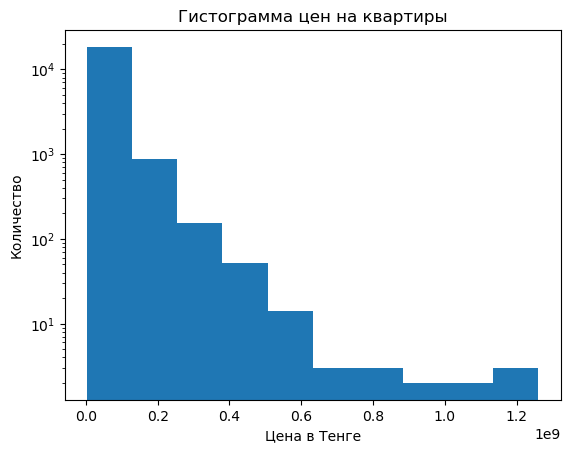

In [182]:
# Визуализация данных
# Your code goes here
# 1e9 = 10^9, то есть числа по оси х надо умножить на 10^9
plt.hist(df['Цена'], bins=10, log=True)
plt.title('Гистограмма цен на квартиры')
plt.xlabel('Цена в Тенге')
plt.ylabel('Количество')
plt.show()



### 📊 * Средняя цена по локациям:

In [183]:
# Your code goes here
df.head(2)

,Название объекта,Цена,Расположение,Район,Количество комнат,Площадь (м²),Construction year,Floor,House Type
1,2-комнатная квартира,23875200,"Жетысуский р-н, Райымбека 241",Жетысуский,2,50,2025,Не указан,Другое
3,3-комнатная квартира,269709000,"Медеуский р-н, Городская 3",Медеуский,3,163,2026,Не указан,Другое


In [184]:
df1 = df.groupby(by='Район')['Цена'].mean()
df1

Район
Алатауский      30,315,306
Алмалинский     49,587,629
Ауэзовский      39,602,887
Бостандыкский   75,104,561
Жетысуский      29,618,665
Медеуский       96,364,948
Наурызбайский   38,365,527
Турксибский     28,941,919
Name: Цена, dtype: float64

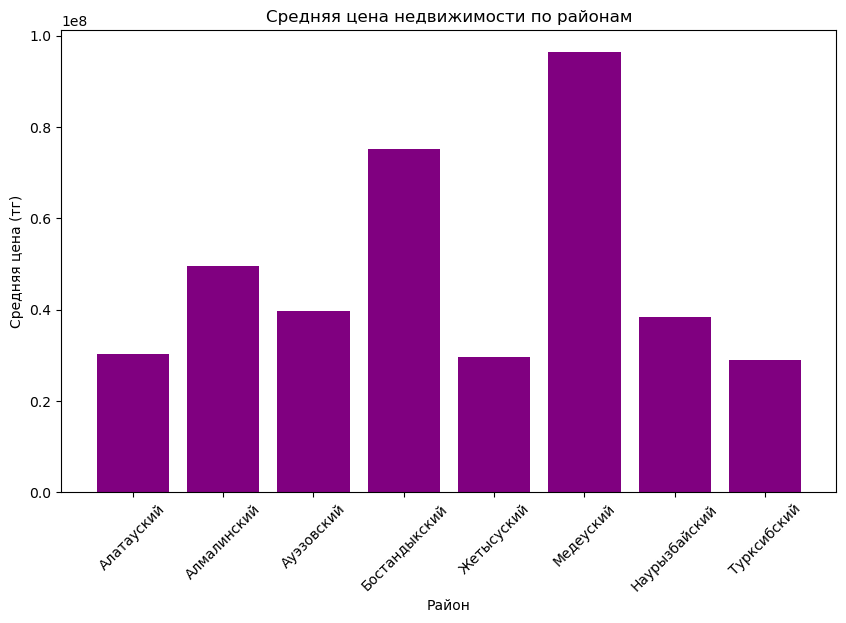

In [185]:
# Визуализация данных
plt.figure(figsize=(10,6))
plt.bar(df1.index, df1.values, color='purple')
plt.xlabel('Район')
plt.ylabel('Средняя цена (тг)')
plt.title('Средняя цена недвижимости по районам')
plt.xticks(rotation=45)
plt.show()


### 📊 * Цена vs. Площадь:

In [186]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [187]:
corr_matrix = df['Цена'].corr(df['Площадь (м²)'])
corr_matrix

0.8170256745286555

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


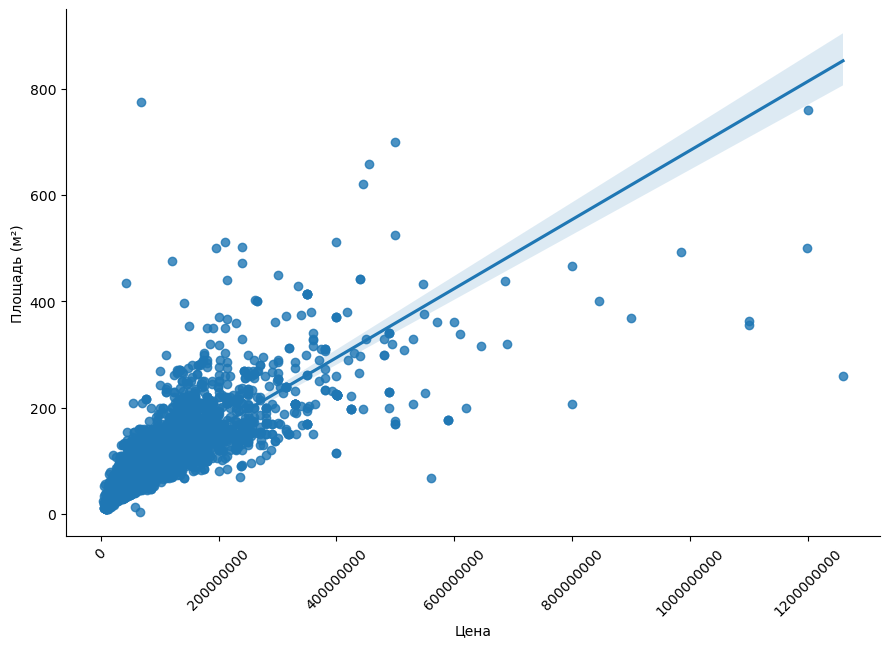

In [188]:
# Визуализация данных
# Your code goes here
sns.lmplot(data=df, x='Цена', y='Площадь (м²)', height=6, aspect=1.5)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)
plt.show()

### 📊 * Распределение цены за квадратный метр:

In [189]:
df.head()

,Название объекта,Цена,Расположение,Район,Количество комнат,Площадь (м²),Construction year,Floor,House Type
1,2-комнатная квартира,23875200,"Жетысуский р-н, Райымбека 241",Жетысуский,2,49.74,2025,Не указан,Другое
3,3-комнатная квартира,269709000,"Медеуский р-н, Городская 3",Медеуский,3,163.46,2026,Не указан,Другое
4,3-комнатная квартира,29317500,"Турксибский р-н, Тараз",Турксибский,3,65.15,2025,Не указан,Другое
5,3-комнатная квартира,99275000,"Бостандыкский р-н, Арайлы 2/12",Бостандыкский,3,104.50,2024,Не указан,Другое
6,3-комнатная квартира,99396960,"Бостандыкский р-н, Лебедева 1/1",Бостандыкский,3,121.81,2025,Не указан,Другое


In [190]:
df['Цена за м²'] = df['Цена'] / df['Площадь (м²)']

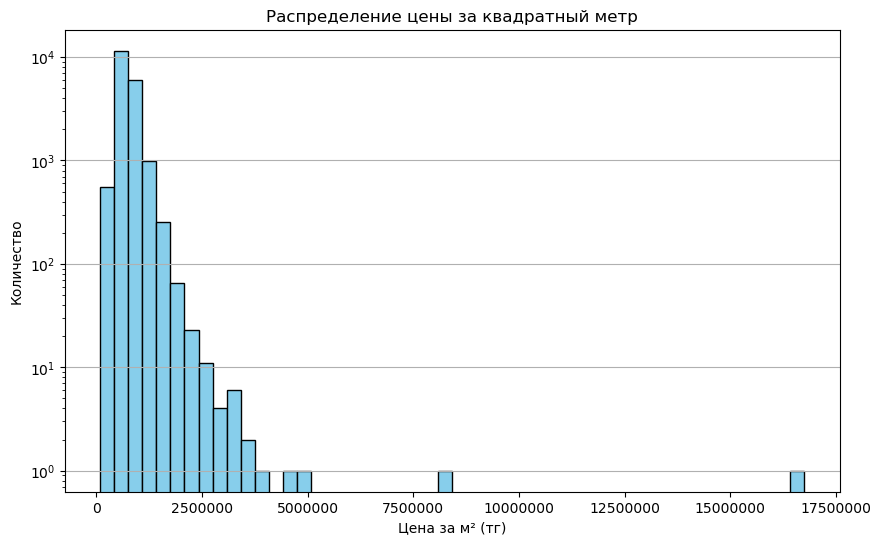

In [191]:
# Визуализация данных
# Your code goes here
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Цена за м²'], bins=50, color='skyblue', edgecolor='black', log=True)
plt.title('Распределение цены за квадратный метр')
plt.xlabel('Цена за м² (тг)')
plt.ylabel('Количество')
plt.ticklabel_format(style='plain', axis='x')  #  Убираем экспоненциальный формат
plt.grid(axis='y')
plt.show()


### 📊 * Анализ количества комнат (Цена в зависимости от количества комнат):

In [192]:
df.head(2)

,Название объекта,Цена,Расположение,Район,Количество комнат,Площадь (м²),Construction year,Floor,House Type,Цена за м²
1,2-комнатная квартира,23875200,"Жетысуский р-н, Райымбека 241",Жетысуский,2,49.74,2025,Не указан,Другое,480000.00
3,3-комнатная квартира,269709000,"Медеуский р-н, Городская 3",Медеуский,3,163.46,2026,Не указан,Другое,1650000.00


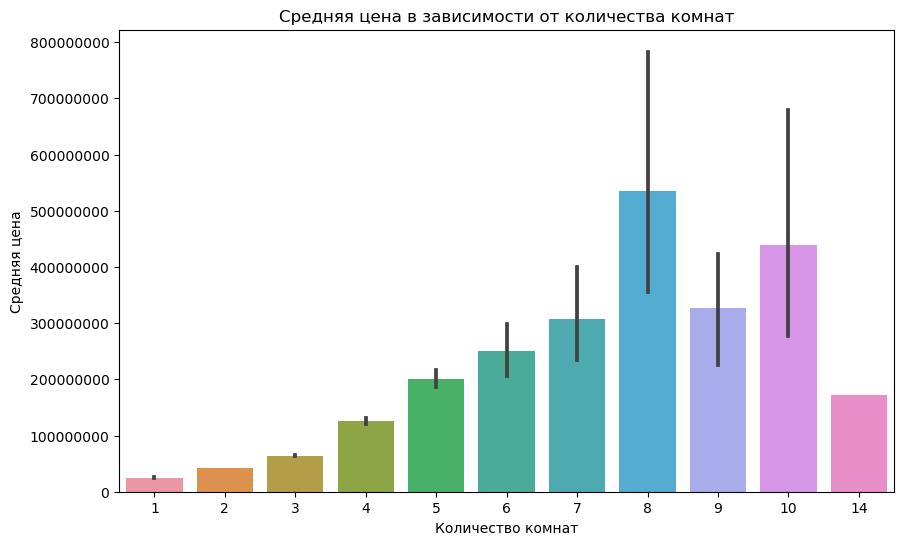

In [193]:
# Визуализация данных
# Your code goes here
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Количество комнат', y='Цена', estimator='mean')
plt.title('Средняя цена в зависимости от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Средняя цена')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

### 📊 * Группировка данных по диапазонам площади:

In [194]:
df.head()

,Название объекта,Цена,Расположение,Район,Количество комнат,Площадь (м²),Construction year,Floor,House Type,Цена за м²
1,2-комнатная квартира,23875200,"Жетысуский р-н, Райымбека 241",Жетысуский,2,49.74,2025,Не указан,Другое,480000.00
3,3-комнатная квартира,269709000,"Медеуский р-н, Городская 3",Медеуский,3,163.46,2026,Не указан,Другое,1650000.00
4,3-комнатная квартира,29317500,"Турксибский р-н, Тараз",Турксибский,3,65.15,2025,Не указан,Другое,450000.00
5,3-комнатная квартира,99275000,"Бостандыкский р-н, Арайлы 2/12",Бостандыкский,3,104.50,2024,Не указан,Другое,950000.00
6,3-комнатная квартира,99396960,"Бостандыкский р-н, Лебедева 1/1",Бостандыкский,3,121.81,2025,Не указан,Другое,816000.00


In [195]:
# Разделите данные на группы по площади (например, 0-50 м², 50-100 м², и т.д.).
def put_area_interval(area):
    
    if area <= 50:
        return "0-50 м²"
        
    if area <= 100:
        return "50-100 м²"
        
    if area <= 150:
        return "100-150 м²"
        
    if area <= 200:
        return "150-200 м²"
    
    if area <= 250:
        return "200-250 м²"
    
    if area <= 300:
        return "250-300 м²"
    
    return "300+ м²"

df['Диапозон площади'] = df['Площадь (м²)'].apply(lambda x: put_area_interval(x))
df.head()
    

,Название объекта,Цена,Расположение,Район,Количество комнат,Площадь (м²),Construction year,Floor,House Type,Цена за м²,Диапозон площади
1,2-комнатная квартира,23875200,"Жетысуский р-н, Райымбека 241",Жетысуский,2,49.74,2025,Не указан,Другое,480000.00,0-50 м²
3,3-комнатная квартира,269709000,"Медеуский р-н, Городская 3",Медеуский,3,163.46,2026,Не указан,Другое,1650000.00,150-200 м²
4,3-комнатная квартира,29317500,"Турксибский р-н, Тараз",Турксибский,3,65.15,2025,Не указан,Другое,450000.00,50-100 м²
5,3-комнатная квартира,99275000,"Бостандыкский р-н, Арайлы 2/12",Бостандыкский,3,104.50,2024,Не указан,Другое,950000.00,100-150 м²
6,3-комнатная квартира,99396960,"Бостандыкский р-н, Лебедева 1/1",Бостандыкский,3,121.81,2025,Не указан,Другое,816000.00,100-150 м²


In [196]:
category_order = [
    "0-50 м²",
    "50-100 м²",
    "100-150 м²",
    "150-200 м²",
    "200-250 м²",
    "250-300 м²",
    "300+ м²"
]
df['Диапозон площади'] = pd.Categorical(df['Диапозон площади'], categories=category_order, ordered=True)


In [197]:

# Вычислите среднюю цену для каждой группы.
print('Средняя цена за квартиру по каждой группе в тенге')
df_mean_price_interval = df.groupby(by='Диапозон площади')['Цена'].mean()
print(df_mean_price_interval)

Средняя цена за квартиру по каждой группе в тенге
Диапозон площади
0-50 м²       27687818.81
50-100 м²     49814484.91
100-150 м²   104860071.89
150-200 м²   177011394.49
200-250 м²   225345151.89
250-300 м²   255718262.53
300+ м²      420852063.50
Name: Цена, dtype: float64


In [198]:
df_mean_price_interval.loc["0-50 м²"]

27687818.810594395

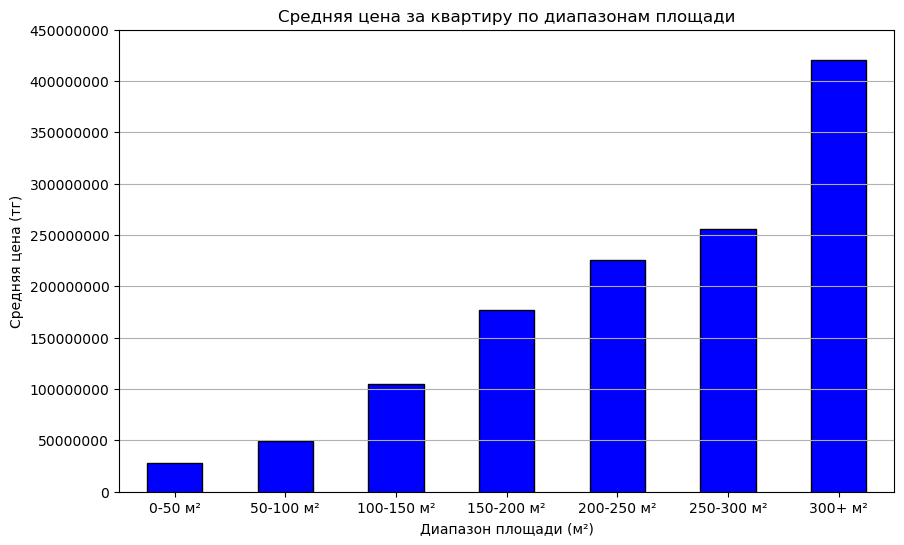

In [199]:
# Визуализация данных
df_mean_price_interval.plot(kind='bar', figsize=(10, 6), color='blue', edgecolor='black')
plt.title('Средняя цена за квартиру по диапазонам площади')
plt.xlabel('Диапазон площади (м²)')
plt.ylabel('Средняя цена (тг)')
plt.xticks(rotation=0)
y_max = df_mean_price_interval.max()
plt.yticks(np.arange(0, y_max + 50000000, 50000000))
plt.ticklabel_format(axis='y', style='plain')
plt.grid(visible=True, axis='y')
plt.show()

### 📊 * Медианная цена по площади:



In [200]:
# Вычислите медианные значения цены в каждом диапазоне площади.

df_median_price_interval = df.groupby(by='Диапозон площади')['Цена'].median()
df_median_price_interval

Диапозон площади
0-50 м²       26000000.00
50-100 м²     45000000.00
100-150 м²    97000000.00
150-200 м²   155000000.00
200-250 м²   191000000.00
250-300 м²   245000000.00
300+ м²      366840000.00
Name: Цена, dtype: float64

### 📊 * Проверка аномалий и удаление:

In [201]:
df.head(2)

,Название объекта,Цена,Расположение,Район,Количество комнат,Площадь (м²),Construction year,Floor,House Type,Цена за м²,Диапозон площади
1,2-комнатная квартира,23875200,"Жетысуский р-н, Райымбека 241",Жетысуский,2,49.74,2025,Не указан,Другое,480000.00,0-50 м²
3,3-комнатная квартира,269709000,"Медеуский р-н, Городская 3",Медеуский,3,163.46,2026,Не указан,Другое,1650000.00,150-200 м²


In [202]:
# Найдите объявления, где цена значительно выше или ниже ожидаемой для определённой площади.

outliers = df[(df['Цена'] > 2 * df_mean_price_interval.loc["0-50 м²"]) & (df['Площадь (м²)'] <= 50)]
print(outliers[['Название объекта', 'Цена', 'Площадь (м²)']])
            


           Название объекта      Цена  Площадь (м²)
74     2-комнатная квартира  61000000         47.00
220    2-комнатная квартира  65000000         50.00
255    2-комнатная квартира  59000000         49.20
350    1-комнатная квартира  65000000         46.40
543    2-комнатная квартира  70000000         50.00
...                     ...       ...           ...
18404  2-комнатная квартира  80000000         50.00
18425  2-комнатная квартира  60000000         46.80
18641  2-комнатная квартира  60000000         48.00
18692  3-комнатная квартира  55500000         47.00
19881  2-комнатная квартира  60000000         48.00

[89 rows x 3 columns]


### 📊 * Корреляционный анализ:

In [203]:
correlation = df['Цена'].corr(df['Площадь (м²)'])
print(f"Коэффициент корреляции между ценой и площадью: {correlation}")




Коэффициент корреляции между ценой и площадью: 0.8170256745286555


### 📊 * График плотности(Bonus):

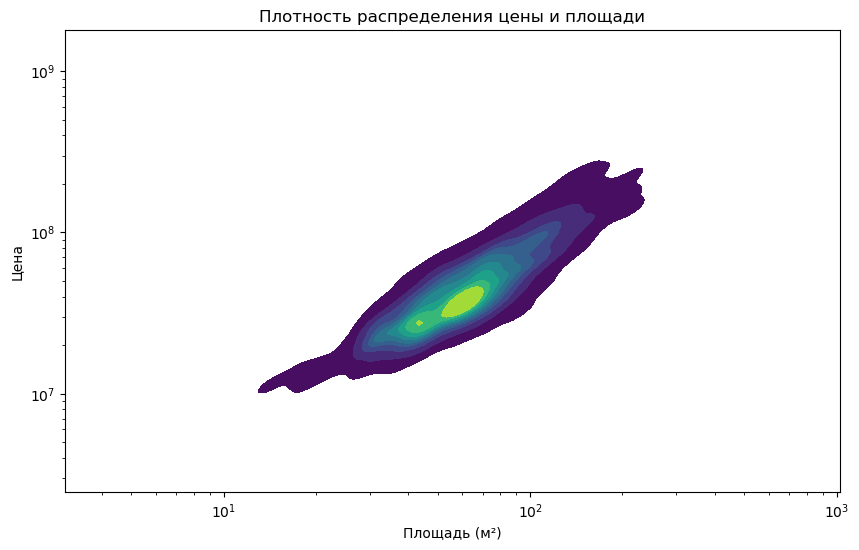

In [204]:
# Визуализация данных
# Постройте график плотности для площади и цены.
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Площадь (м²)', y='Цена', fill=True, cmap='viridis', log_scale=True)
plt.title("Плотность распределения цены и площади")
plt.xlabel("Площадь (м²)")
plt.ylabel("Цена")
plt.show()




### 📊 * Детализация диапазонов площади(Bonus):

In [205]:
# Разделите площади на более мелкие категории (например, каждые 10 м²). Это поможет обнаружить более детализированные тренды.
bins = list(range(0, 310, 10))  # Диапазоны каждые 10 м²
labels = [f"{i}-{i+10} м²" for i in range(0, 300, 10)]
df['Диапозон площади'] = pd.cut(df['Площадь (м²)'], bins=bins, labels=labels, right=False)




In [206]:
df.head()

,Название объекта,Цена,Расположение,Район,Количество комнат,Площадь (м²),Construction year,Floor,House Type,Цена за м²,Диапозон площади
1,2-комнатная квартира,23875200,"Жетысуский р-н, Райымбека 241",Жетысуский,2,49.74,2025,Не указан,Другое,480000.00,40-50 м²
3,3-комнатная квартира,269709000,"Медеуский р-н, Городская 3",Медеуский,3,163.46,2026,Не указан,Другое,1650000.00,160-170 м²
4,3-комнатная квартира,29317500,"Турксибский р-н, Тараз",Турксибский,3,65.15,2025,Не указан,Другое,450000.00,60-70 м²
5,3-комнатная квартира,99275000,"Бостандыкский р-н, Арайлы 2/12",Бостандыкский,3,104.50,2024,Не указан,Другое,950000.00,100-110 м²
6,3-комнатная квартира,99396960,"Бостандыкский р-н, Лебедева 1/1",Бостандыкский,3,121.81,2025,Не указан,Другое,816000.00,120-130 м²


### 📊 # * Сегментация по типу недвижимости(Bonus):

In [ ]:
# Визуализация данных
# Разделите данные на категории (например, квартиры, дома) и проанализируйте зависимость цены от площади в каждом сегменте.
# df['Тип_недвижимости'] = df['Название'].str.extract('(квартира|дом|дача|таунхаус)', expand=False)
# sns.scatterplot(data=df, x='Площадь', y='Цена', hue='Тип_недвижимости')



### 📊 * Объединение анализа площади с количеством комнат(Bonus):

In [207]:
# Выясните, как связаны площадь, цена и количество комнат.
corr = df[['Площадь (м²)', 'Цена', 'Количество комнат']].corr()
corr

# чем больше площадь тем больше цена (strong)
# в принципе чем больше комнат тем больше цена, но это не так сильно выражено

,Площадь (м²),Цена,Количество комнат
Площадь (м²),1.00,0.82,0.77
Цена,0.82,1.00,0.59
Количество комнат,0.77,0.59,1.00


### 📊 * Площадь и этажность(Bonus):

In [174]:
df.head()

,Название объекта,Цена,Расположение,Район,Количество комнат,Площадь (м²),Construction year,Floor,House Type,Цена за м²,Диапозон площади
0,3-комнатная квартира,269709000,"Медеуский р-н, Городская 3",Медеуский,3,163.46,2026,Не указан,Другое,1650000.00,160-170 м²
1,4-комнатная квартира,208260000,"Наурызбайский р-н, мкр Рахат, мкр. Рахат, ул. ...",Наурызбайский,4,160.20,2025,Не указан,Другое,1300000.00,160-170 м²
2,4-комнатная квартира,92182500,"Алмалинский р-н, проспект Абая 165",Алмалинский,4,122.91,2022,Не указан,Другое,750000.00,120-130 м²
3,3-комнатная квартира,32500000,"Ауэзовский р-н, мкр №6",Ауэзовский,3,60.00,1965,2/4,панельный дом,541666.67,60-70 м²
4,2-комнатная квартира,39500000,"Медеуский р-н, Достык 103/31А — Омарова",Медеуский,2,40.00,1970,1/5,панельный дом,987500.00,40-50 м²


In [208]:
# Если в данных есть информация об этажах, проанализируйте, как этажность влияет на стоимость недвижимости разной площади.
df = df[df['Floor'] !='Не указан']
df.head(2)

,Название объекта,Цена,Расположение,Район,Количество комнат,Площадь (м²),Construction year,Floor,House Type,Цена за м²,Диапозон площади
11,2-комнатная квартира,20000000,"Турксибский р-н, Щербакова — Щербакова уг.Тыны...",Турксибский,2,48.00,1965,1/2,кирпичный дом,416666.67,40-50 м²
12,1-комнатная квартира,13000000,"Турксибский р-н, Монтажная 1 — Майлина",Турксибский,1,28.00,1963,2/2,кирпичный дом,464285.71,20-30 м²


In [209]:
df['Floor'] = df['Floor'].str.split('/').str[0].astype(int)

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_114648\2793678159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Floor'] = df['Floor'].str.split('/').str[0].astype(int)


In [210]:
df.head(2)

,Название объекта,Цена,Расположение,Район,Количество комнат,Площадь (м²),Construction year,Floor,House Type,Цена за м²,Диапозон площади
11,2-комнатная квартира,20000000,"Турксибский р-н, Щербакова — Щербакова уг.Тыны...",Турксибский,2,48.00,1965,1,кирпичный дом,416666.67,40-50 м²
12,1-комнатная квартира,13000000,"Турксибский р-н, Монтажная 1 — Майлина",Турксибский,1,28.00,1963,2,кирпичный дом,464285.71,20-30 м²


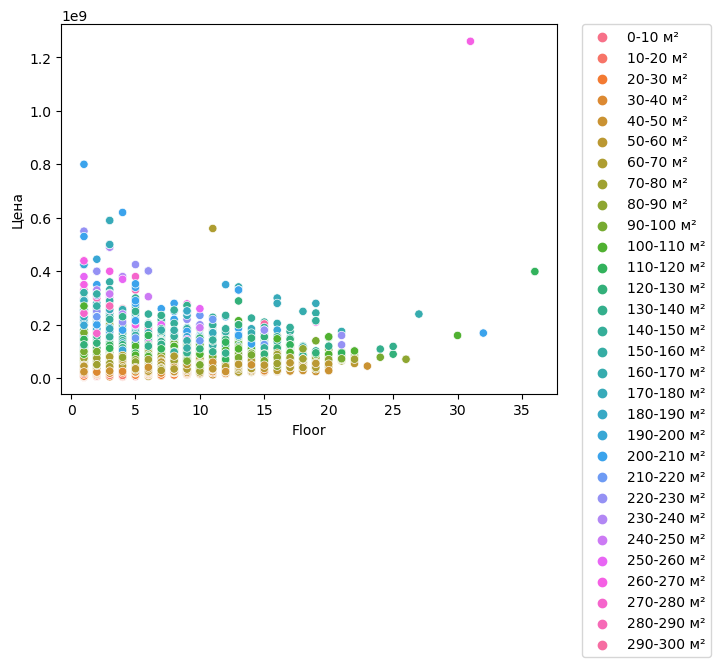

In [211]:
# Визуализация данных
sns.scatterplot(df, x='Floor', y='Цена', hue='Диапозон площади')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.) 


### **Этап 5: Получение инсайтов**

### 📊 1. Самые дорогие локации:

In [212]:
df.head(2)



,Название объекта,Цена,Расположение,Район,Количество комнат,Площадь (м²),Construction year,Floor,House Type,Цена за м²,Диапозон площади
11,2-комнатная квартира,20000000,"Турксибский р-н, Щербакова — Щербакова уг.Тыны...",Турксибский,2,48.00,1965,1,кирпичный дом,416666.67,40-50 м²
12,1-комнатная квартира,13000000,"Турксибский р-н, Монтажная 1 — Майлина",Турксибский,1,28.00,1963,2,кирпичный дом,464285.71,20-30 м²


In [213]:
# Выведите топ-5 локаций с самой высокой средней ценой.
top_expensive_districts = df.groupby('Район')['Цена'].mean().sort_values(ascending=False)
top_expensive_districts.head()

Район
Медеуский       92138318.46
Бостандыкский   74502165.59
Алмалинский     49466154.50
Ауэзовский      39422158.71
Наурызбайский   36965502.85
Name: Цена, dtype: float64

### 📊 2. Локации с лучшей стоимостью:

In [214]:
# Определите локации с минимальной ценой за квадратный метр.
top_cheap_districts = df.groupby('Район')['Цена'].mean().sort_values()
top_cheap_districts.head()

Район
Турксибский     28856249.20
Жетысуский      29428218.23
Алатауский      30339888.27
Наурызбайский   36965502.85
Ауэзовский      39422158.71
Name: Цена, dtype: float64

### 📊 3. Тренды цен по дням:

In [ ]:
# Если данные содержат дату публикации, проанализируйте тренды цен.
# таких данных у меня нет

### 📊 4. Популярные размеры недвижимости:

In [215]:
# Определите, какие размеры недвижимости наиболее популярны.
popular_area = df.value_counts('Диапозон площади')
popular_area.head()

Диапозон площади
40-50 м²    3401
60-70 м²    2982
50-60 м²    2874
70-80 м²    2134
30-40 м²    1988
Name: count, dtype: int64

### 📊 5. Сравнение предложение и цен:

In [216]:
# Определите, коррелируют ли высокий предложение и высокие цены
grouped = df.groupby('Район').agg({'Цена': 'mean', 'Район': 'count'}).rename(columns={'Район': 'Колво предложений'}).reset_index()

corr = grouped['Колво предложений'].corr(grouped['Цена'])
corr

# умеренная положительная корреляция. Это означает, что существует определённая связь между количеством предложений и 
# ценами, но она не является сильной. 

0.49839250682712855

### 📊 6. Группировка по локациям:

In [217]:
df.head(2)

,Название объекта,Цена,Расположение,Район,Количество комнат,Площадь (м²),Construction year,Floor,House Type,Цена за м²,Диапозон площади
11,2-комнатная квартира,20000000,"Турксибский р-н, Щербакова — Щербакова уг.Тыны...",Турксибский,2,48.00,1965,1,кирпичный дом,416666.67,40-50 м²
12,1-комнатная квартира,13000000,"Турксибский р-н, Монтажная 1 — Майлина",Турксибский,1,28.00,1963,2,кирпичный дом,464285.71,20-30 м²


In [218]:
# Рассчитайте среднюю цену за квадратный метр для каждой локации.
avg_price_meter_district = df.groupby('Район').agg({'Площадь (м²)': 'mean', 'Цена': 'mean'}).reset_index()
avg_price_meter_district['Средняя цена за кв.м.'] = avg_price_meter_district['Цена'] / avg_price_meter_district['Площадь (м²)']
avg_price_meter_district

,Район,Площадь (м²),Цена,Средняя цена за кв.м.
0,Алатауский,56.14,30339888.27,540444.03
1,Алмалинский,63.61,49466154.50,777669.56
2,Ауэзовский,60.36,39422158.71,653104.78
3,Бостандыкский,82.51,74502165.59,902958.19
4,Жетысуский,52.44,29428218.23,561212.76
5,Медеуский,94.62,92138318.46,973793.99
6,Наурызбайский,63.95,36965502.85,578077.74
7,Турксибский,54.26,28856249.20,531770.36


### 📊 7. Распределение цен по квадратному метру (гистограмма):

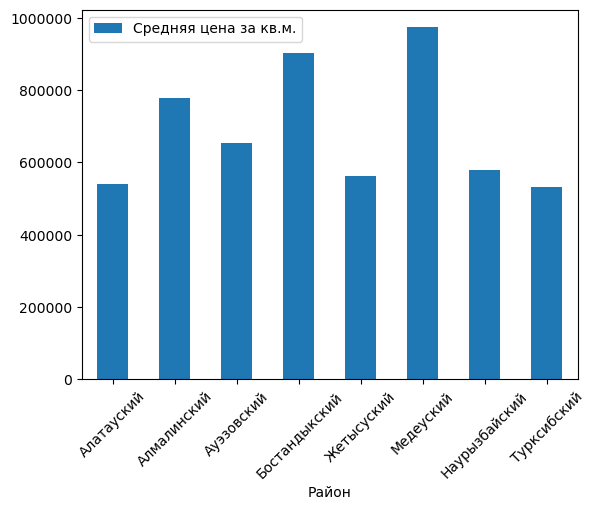

In [219]:
# Визуализация данных
# Постройте гистограмму для отображения распределения цен за квадратный метр.
avg_price_meter_district.plot(x='Район', y='Средняя цена за кв.м.', kind='bar')
plt.ticklabel_format(axis='y', style='plain')
plt.xticks(rotation=45)
plt.show()

### 📊 8. Локации с самой высокой и низкой стоимостью за м²:

In [220]:
# Найдите локации с максимальной и минимальной стоимостью за квадратный метр.
print('Maximum:')
print(avg_price_meter_district[avg_price_meter_district['Средняя цена за кв.м.']==avg_price_meter_district['Средняя цена за кв.м.'].max()])
print('\n\n')
print('Minimum: ')
print(print(avg_price_meter_district[avg_price_meter_district['Средняя цена за кв.м.']==avg_price_meter_district['Средняя цена за кв.м.'].min()]))

Maximum:
       Район  Площадь (м²)        Цена  Средняя цена за кв.м.
5  Медеуский         94.62 92138318.46              973793.99



Minimum: 
         Район  Площадь (м²)        Цена  Средняя цена за кв.м.
7  Турксибский         54.26 28856249.20              531770.36
None


### 📊 9. Анализ аномалий:

In [221]:
# Найдите объявления, где цена за квадратный метр выше или ниже среднего значения для конкретной локации.
avg_price_meter_dict = avg_price_meter_district.set_index('Район')['Средняя цена за кв.м.'].to_dict()
avg_price_meter_dict
# Преобразует таблицу в словарь

{'Алатауский': 540444.030024896,
 'Алмалинский': 777669.5603923406,
 'Ауэзовский': 653104.7778943878,
 'Бостандыкский': 902958.1944119548,
 'Жетысуский': 561212.7587616051,
 'Медеуский': 973793.9889023757,
 'Наурызбайский': 578077.7434136412,
 'Турксибский': 531770.3597745391}

In [63]:
# map для доступа к данным из словаря:
outliers = df[(df['Цена'] / df['Площадь (м²)'] > 1.5 * df['Район'].map(avg_price_meter_dict)) |
              (df['Цена'] / df['Площадь (м²)'] < 0.5 * df['Район'].map(avg_price_meter_dict))]
outliers

,Название объекта,Цена,Расположение,Район,Количество комнат,Площадь (м²),Construction year,Floor,House Type,Цена за м²,Диапозон площади
19,3-комнатная квартира,65000000,"Наурызбайский р-н, Жана 21д",Наурызбайский,3,72.00,2023,2,панельный дом,902777.78,70-80 м²
23,3-комнатная квартира,65000000,"Наурызбайский р-н, Жана 21д",Наурызбайский,3,72.00,2023,2,панельный дом,902777.78,70-80 м²
77,3-комнатная квартира,108000000,"Ауэзовский р-н, мкр Мамыр, Афцинао 4",Ауэзовский,3,93.00,2017,8,кирпичный дом,1161290.32,90-100 м²
105,3-комнатная квартира,205000000,"Медеуский р-н, Митина 4 — Достык",Медеуский,3,134.00,2017,5,монолитный дом,1529850.75,130-140 м²
130,1-комнатная квартира,12800000,"Наурызбайский р-н, мкр Шугыла 7Б",Наурызбайский,1,45.00,2025,11,монолитный дом,284444.44,40-50 м²
...,...,...,...,...,...,...,...,...,...,...,...
19863,1-комнатная квартира,29000000,"Наурызбайский р-н, 13-я улица — Школа Tamos ed...",Наурызбайский,1,33.04,2023,3,монолитный дом,877723.97,30-40 м²
19901,4-комнатная квартира,110000000,"Наурызбайский р-н, Сейдимбек 102/2",Наурызбайский,4,102.00,2024,2,монолитный дом,1078431.37,100-110 м²
19908,2-комнатная квартира,50000000,"Турксибский р-н, Беимбета Майлина 26",Турксибский,2,43.00,1957,1,кирпичный дом,1162790.70,40-50 м²
19931,3-комнатная квартира,73000000,"Наурызбайский р-н, Аскарова Асанбая",Наурызбайский,3,82.00,2008,1,монолитный дом,890243.90,80-90 м²


### 📊 10. Диапазоны цены за квадратный метр:

In [222]:
# Разделите данные на диапазоны (например, дешёвое жильё, средний сегмент, элитное жильё).
def set_house_class(meter_price):
    if meter_price <= 500000:
        return 'Эконом'
    if meter_price <= 1000000:
        return 'Комфорт'
    if meter_price <= 1500000:
        return 'Бизнес'
    return 'Чиновник'

df['Класс жилья'] = df['Цена за м²'].apply(lambda x: set_house_class(x))
df.head()

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_114648\1811252666.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Класс жилья'] = df['Цена за м²'].apply(lambda x: set_house_class(x))


,Название объекта,Цена,Расположение,Район,Количество комнат,Площадь (м²),Construction year,Floor,House Type,Цена за м²,Диапозон площади,Класс жилья
11,2-комнатная квартира,20000000,"Турксибский р-н, Щербакова — Щербакова уг.Тыны...",Турксибский,2,48.00,1965,1,кирпичный дом,416666.67,40-50 м²,Эконом
12,1-комнатная квартира,13000000,"Турксибский р-н, Монтажная 1 — Майлина",Турксибский,1,28.00,1963,2,кирпичный дом,464285.71,20-30 м²,Эконом
18,3-комнатная квартира,55000000,"Алмалинский р-н, Сейфуллина 514 — Стадион Дина...",Алмалинский,3,75.00,1980,1,кирпичный дом,733333.33,70-80 м²,Комфорт
20,1-комнатная квартира,28500000,"Алатауский р-н, мкр Нуркент (Алгабас-1), Бауыр...",Алатауский,1,43.00,2025,10,монолитный дом,662790.70,40-50 м²,Комфорт
22,3-комнатная квартира,43500000,"Наурызбайский р-н, Кенесары хана 54/21",Наурызбайский,3,67.00,2014,4,монолитный дом,649253.73,60-70 м²,Комфорт


### 📊 12. Детализация по годам постройки:

In [223]:
# Выясните, как цена за квадратный метр зависит от года постройки недвижимости.
df['Цена за м²'].corr(df['Construction year'])



0.10948861143075439

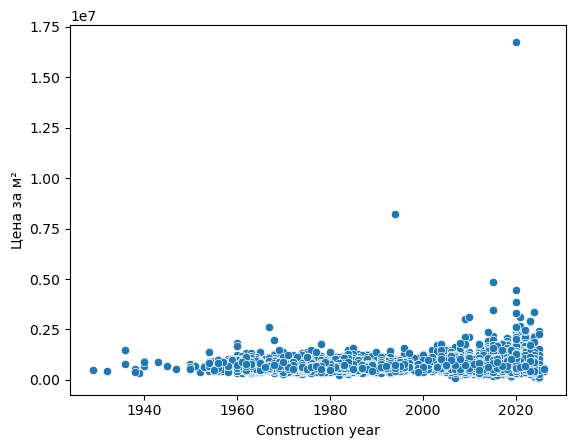

In [224]:
# Визуализация данных
sns.scatterplot(data=df, y='Цена за м²', x='Construction year')
plt.show()

In [ ]:
# Цена за квадратный метр не сильно зависит от года постройки.

### 📊 13. Сравнение популярных локаций:

In [225]:
df.head(2)

,Название объекта,Цена,Расположение,Район,Количество комнат,Площадь (м²),Construction year,Floor,House Type,Цена за м²,Диапозон площади,Класс жилья
11,2-комнатная квартира,20000000,"Турксибский р-н, Щербакова — Щербакова уг.Тыны...",Турксибский,2,48.00,1965,1,кирпичный дом,416666.67,40-50 м²,Эконом
12,1-комнатная квартира,13000000,"Турксибский р-н, Монтажная 1 — Майлина",Турксибский,1,28.00,1963,2,кирпичный дом,464285.71,20-30 м²,Эконом


In [226]:
# Сравните распределение цены за квадратный метр в топ-5 популярных районах.
popular_districts = df.value_counts('Район').head()
popular_districts

Район
Бостандыкский    5536
Алмалинский      3119
Ауэзовский       3091
Медеуский        1784
Алатауский       1690
Name: count, dtype: int64

In [227]:
popular_districts.index

Index(['Бостандыкский', 'Алмалинский', 'Ауэзовский', 'Медеуский',
       'Алатауский'],
      dtype='object', name='Район')

In [228]:
popular_district_names = popular_districts.index
popular_district_names

Index(['Бостандыкский', 'Алмалинский', 'Ауэзовский', 'Медеуский',
       'Алатауский'],
      dtype='object', name='Район')

In [229]:
avg_price_per_meter = df.groupby('Район')['Цена за м²'].mean()
avg_price_per_meter

Район
Алатауский      548803.24
Алмалинский     782811.87
Ауэзовский      656810.73
Бостандыкский   869675.04
Жетысуский      568203.12
Медеуский       925839.53
Наурызбайский   579911.06
Турксибский     537234.95
Name: Цена за м², dtype: float64

In [230]:
avg_price_per_meter_top5 = avg_price_per_meter[popular_district_names]
avg_price_per_meter_top5

Район
Бостандыкский   869675.04
Алмалинский     782811.87
Ауэзовский      656810.73
Медеуский       925839.53
Алатауский      548803.24
Name: Цена за м², dtype: float64

### 📊 14. Анализ разброса цен по районам:

In [231]:
# Для каждой локации найдите минимальную, максимальную и медианную цену за квадратный метр.
df.head(2)

,Название объекта,Цена,Расположение,Район,Количество комнат,Площадь (м²),Construction year,Floor,House Type,Цена за м²,Диапозон площади,Класс жилья
11,2-комнатная квартира,20000000,"Турксибский р-н, Щербакова — Щербакова уг.Тыны...",Турксибский,2,48.00,1965,1,кирпичный дом,416666.67,40-50 м²,Эконом
12,1-комнатная квартира,13000000,"Турксибский р-н, Монтажная 1 — Майлина",Турксибский,1,28.00,1963,2,кирпичный дом,464285.71,20-30 м²,Эконом


In [232]:
price_stats_by_location = df.groupby('Район')['Цена за м²'].agg(['min', 'max', 'median']).reset_index()
price_stats_by_location

,Район,min,max,median
0,Алатауский,123217.74,987654.32,549157.69
1,Алмалинский,326264.27,2058823.53,746153.85
2,Ауэзовский,350000.00,1384615.38,643340.86
3,Бостандыкский,98850.57,16750000.00,819047.62
4,Жетысуский,111111.11,1303030.30,564333.54
5,Медеуский,227272.73,8235294.12,882434.05
6,Наурызбайский,140000.00,1579787.23,562500.00
7,Турксибский,184210.53,1071428.57,529411.76


### 📊 15. Детализация аномалий:

In [233]:
# Найдите районы, где разброс цен за квадратный метр самый высокий (максимальная разница между минимальной и максимальной ценой).
price_stats_by_location['Price spread'] = price_stats_by_location['max'] - price_stats_by_location['min']
price_stats_by_location

,Район,min,max,median,Price spread
0,Алатауский,123217.74,987654.32,549157.69,864436.58
1,Алмалинский,326264.27,2058823.53,746153.85,1732559.26
2,Ауэзовский,350000.00,1384615.38,643340.86,1034615.38
3,Бостандыкский,98850.57,16750000.00,819047.62,16651149.43
4,Жетысуский,111111.11,1303030.30,564333.54,1191919.19
5,Медеуский,227272.73,8235294.12,882434.05,8008021.39
6,Наурызбайский,140000.00,1579787.23,562500.00,1439787.23
7,Турксибский,184210.53,1071428.57,529411.76,887218.05


In [234]:
max_spread_location = price_stats_by_location.loc[price_stats_by_location['Price spread'].idxmax()]
print(max_spread_location)


Район           Бостандыкский
min                  98850.57
max               16750000.00
median              819047.62
Price spread      16651149.43
Name: 3, dtype: object


In [235]:
sorted_locations = price_stats_by_location.sort_values(by='Price spread', ascending=False)
print(sorted_locations.head())


           Район       min         max    median  Price spread
3  Бостандыкский  98850.57 16750000.00 819047.62   16651149.43
5      Медеуский 227272.73  8235294.12 882434.05    8008021.39
1    Алмалинский 326264.27  2058823.53 746153.85    1732559.26
6  Наурызбайский 140000.00  1579787.23 562500.00    1439787.23
4     Жетысуский 111111.11  1303030.30 564333.54    1191919.19
